In [86]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt
import time

In [87]:
# Initialize data storage for plotting
# timestamps = []
# water_temperatures = []
# ph_levels = []
# turbidities = []
# dissolved_oxygen_levels = []
sensor_data_dict = {}

In [88]:
# Kafka configuration
def initialize_consumer():
    kafka_topic = "water_quality"
    kafka_bootstrap_servers = ["localhost:9092"]

    # Create Kafka consumer
    consumer = KafkaConsumer(
        kafka_topic,
        bootstrap_servers=kafka_bootstrap_servers,
        value_deserializer=lambda m: json.loads(m.decode('utf-8')),
        auto_offset_reset='latest',
        enable_auto_commit=True,
        group_id="water_quality_processors"
    )
    return consumer

In [89]:
def update_plot(consumer):

    try:
        for message in consumer:
            
            sensor_data = message.value
            
            print(f"Received: {sensor_data}")
            
            sensor_id = sensor_data['sensor_id']  
            print(f"id: {sensor_id}")
            if sensor_id not in sensor_data_dict:
                sensor_data_dict[sensor_id] = {
                    'timestamps': [],
                    'water_temperatures': [],
                    'ph_levels': [],
                    'turbidities': [],
                    'dissolved_oxygen_levels': []
                }

            sensor_data_dict[sensor_id]['timestamps'].append(sensor_data['timestamp'])
            sensor_data_dict[sensor_id]['water_temperatures'].append(sensor_data['water_temperature'])
            sensor_data_dict[sensor_id]['ph_levels'].append(sensor_data['ph_level'])
            sensor_data_dict[sensor_id]['turbidities'].append(sensor_data['turbidity'])
            sensor_data_dict[sensor_id]['dissolved_oxygen_levels'].append(sensor_data['dissolved_oxygen'])

            # Keep only the last 100 entries for plotting
            if len(sensor_data_dict[sensor_id]['timestamps']) > 100:
                sensor_data_dict[sensor_id]['timestamps'].pop(0)
                sensor_data_dict[sensor_id]['water_temperatures'].pop(0)
                sensor_data_dict[sensor_id]['ph_levels'].pop(0)
                sensor_data_dict[sensor_id]['turbidities'].pop(0)
                sensor_data_dict[sensor_id]['dissolved_oxygen_levels'].pop(0)

            data = sensor_data_dict[sensor_id]
        
            timestamps = data['timestamps']
            water_temperatures = data['water_temperatures']
            ph_levels = data['ph_levels']
            turbidities = data['turbidities']
            dissolved_oxygen_levels = data['dissolved_oxygen_levels']


            plt.figure(figsize=(10, 8))

            plt.subplot(2, 2, 1)
            plt.plot(timestamps, water_temperatures, label="Water Temperature", color="blue")
            plt.title(f"Sensor {sensor_id} - Water Temperature")
            plt.ylabel("°C")

            plt.subplot(2, 2, 2)
            plt.plot(timestamps, ph_levels, label="pH Level", color="green")
            plt.title(f"Sensor {sensor_id} - pH Level")
            plt.ylabel("pH")

            plt.subplot(2, 2, 3)
            plt.plot(timestamps, turbidities, label="Turbidity", color="orange")
            plt.title(f"Sensor {sensor_id} - Turbidity")
            plt.ylabel("NTU")

            plt.subplot(2, 2, 4)
            plt.plot(timestamps, dissolved_oxygen_levels, label="Dissolved Oxygen", color="red")
            plt.title(f"Sensor {sensor_id} - Dissolved Oxygen")
            plt.ylabel("mg/L")

            plt.tight_layout()
            # Save the plot as an image
            plt.savefig(f"sensor_{sensor_id}_water_quality_plot.png")
            plt.close()

            break
    except KeyboardInterrupt:
        print("Stopped consuming messages.")
        consumer.close()

Subscribed to Kafka topic 'water_quality'.
Received: {'sensor_id': 0, 'timestamp': 1741186007, 'water_temperature': 27.06355093495869, 'ph_level': 8.537601663239226, 'turbidity': 6.9, 'dissolved_oxygen': 10.94}
id: 0
Received: {'sensor_id': 2, 'timestamp': 1741186007, 'water_temperature': 27.198155961558488, 'ph_level': 8.510099427001753, 'turbidity': 7.39, 'dissolved_oxygen': 8.93}
id: 2
Received: {'sensor_id': 5, 'timestamp': 1741186007, 'water_temperature': 26.98448998435099, 'ph_level': 7.6678319069926655, 'turbidity': 8.34, 'dissolved_oxygen': 6.46}
id: 5
Received: {'sensor_id': 0, 'timestamp': 1741186008, 'water_temperature': 26.782954847719257, 'ph_level': 7.680492381068248, 'turbidity': 33.72, 'dissolved_oxygen': 6.29}
id: 0
Received: {'sensor_id': 2, 'timestamp': 1741186008, 'water_temperature': 28.43345880389717, 'ph_level': 8.25586257019255, 'turbidity': 19.98, 'dissolved_oxygen': 9.43}
id: 2
Received: {'sensor_id': 5, 'timestamp': 1741186008, 'water_temperature': 27.0390922

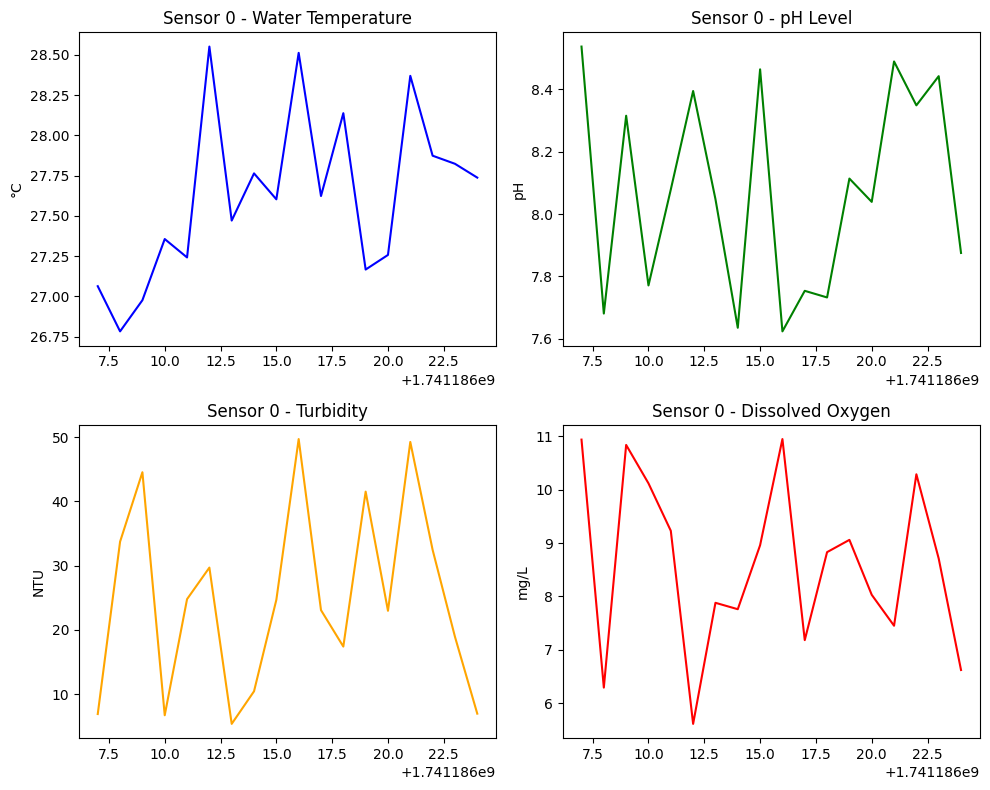

In [90]:
consumer = initialize_consumer()
print("Subscribed to Kafka topic 'water_quality'.")

try:
    while True:
        update_plot(consumer)
except KeyboardInterrupt:
    print("Stopped visualization.")
    consumer.close()